In [1]:
# https://www.kaggle.com/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy.stats import binned_statistic

import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn import svm


from mlxtend.feature_selection import SequentialFeatureSelector
import collections

from sklearn.cluster import KMeans

from sklearn.metrics import confusion_matrix



from sklearn.naive_bayes import GaussianNB


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold


from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict


import warnings

import copy
warnings.filterwarnings("ignore")





In [2]:
file_location = "./data/creditcard.csv"

In [3]:
df = pd.read_csv(file_location)

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Class column determines if transaction is Fraudulent


In [7]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Determine percentage of Fraudlent and Crediable Transactions

In [8]:
def get_percentage(value, total):
    return round((value / total) * 100, 2)

In [9]:
def print_transaction_percentage(df):
    CREDIBLE = 0
    FRAUDULENT = 1
    total_transactions = len(df['Class'])
    total_credible_transactions = df['Class'].value_counts()[CREDIBLE]
    total_fraud_transactions = df['Class'].value_counts()[FRAUDULENT]
    print("Credible Transactions: "+ str(get_percentage(total_credible_transactions, total_transactions)))
    print("Fraudulent Transactions: "+ str(get_percentage(total_fraud_transactions, total_transactions)))

In [10]:
print_transaction_percentage(df)

Credible Transactions: 99.83
Fraudulent Transactions: 0.17


In [11]:
def plot_count(df, title, col):
    sns.countplot(col, data=df)
    plt.title(title, fontsize=20)

In [12]:
def create_distributed_plot(sub_df, title):
    f, ax = plt.subplots(1, 1, figsize=(18,4))
    col_array_vals = sub_df.values
    sns.distplot(col_array_vals, ax=ax, color='r')
    ax.set_title(title, fontsize=14)
    ax.set_xlim([min(col_array_vals), max(col_array_vals)])

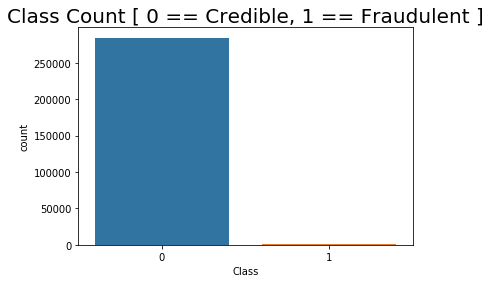

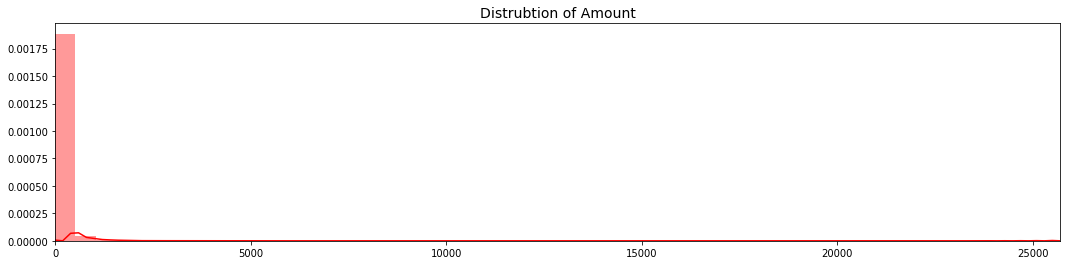

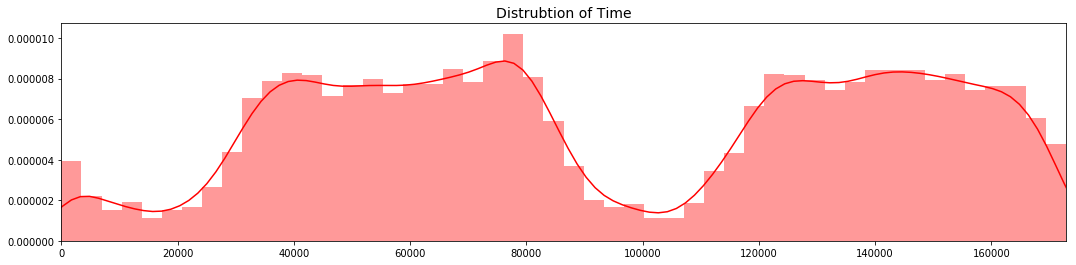

In [13]:
plot_count(df, 'Class Count [ 0 == Credible, 1 == Fraudulent ]', 'Class')
create_distributed_plot(df['Amount'], 'Distrubtion of Amount')
create_distributed_plot(df['Time'], 'Distrubtion of Time')
plt.show()

In [14]:
bins_amount = 100

In [15]:
# equal sized bins
df['bin_time'] = pd.cut(df['Time'], bins=bins_amount, labels=False )

In [16]:
df['bin_time'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [17]:
len(df['bin_time'].unique())

100

In [30]:
df['bin_amount'] = pd.cut(df['Amount'], bins=100, labels=False )

In [32]:
df['bin_amount'].unique()

array([ 0,  1,  5,  4,  2,  3, 14,  6,  9, 30, 11,  7, 15, 10,  8, 23, 13,
       20, 28, 19, 16, 12, 17, 27, 25, 50, 18, 22, 46, 29, 76, 21, 34, 24,
       73, 45, 26, 32, 38, 31, 99, 39])

In [33]:
df.drop(['Amount', 'Time'], axis=1, inplace=True )

In [34]:
df.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,bin_time,bin_amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,0,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,0,1
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0,0
5,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,...,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,0,0,0
6,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,...,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,0,0,0
7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,...,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,0,0,0
8,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,...,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,0,0,0
9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,...,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,0,0,0


In [35]:
def show_correlation_matrix(data, title):
    f, ax = plt.subplots(1, 1, figsize=(12,10))
    # Entire DataFrame
    corr = data.corr()
    sns.heatmap(corr, cmap='coolwarm_r', ax=ax)
    ax.set_title(title, fontsize=14)

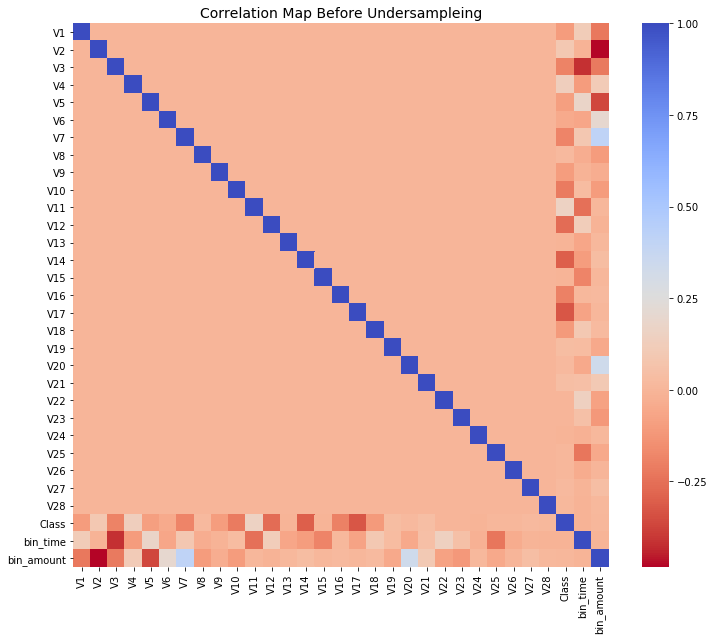

In [36]:
show_correlation_matrix(df, 'Correlation Map Before Undersampleing')

In [37]:
# shuffle
df = df.sample(frac=1)

In [38]:
# Creating a balanced df
fraud_df = df.loc[df['Class'] == 1]
crediable_df = df.loc[df['Class'] == 0][:len(fraud_df)]
balanced_df = pd.concat([fraud_df, crediable_df]).sample(frac=1, random_state = 50)

In [39]:
len(balanced_df)

984

In [40]:
print_transaction_percentage(balanced_df)

Credible Transactions: 50.0
Fraudulent Transactions: 50.0


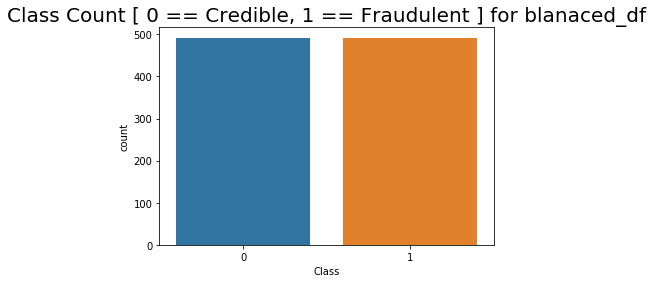

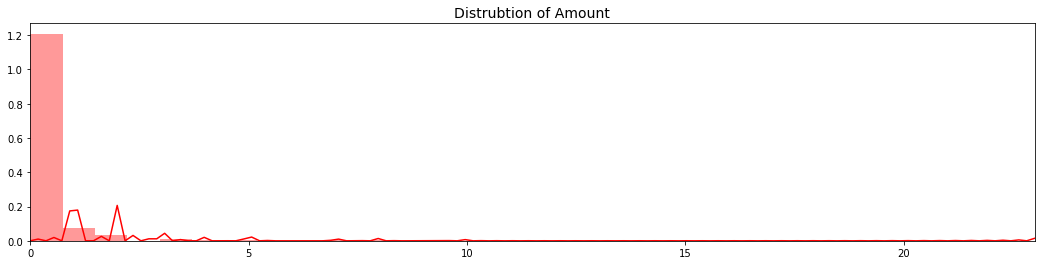

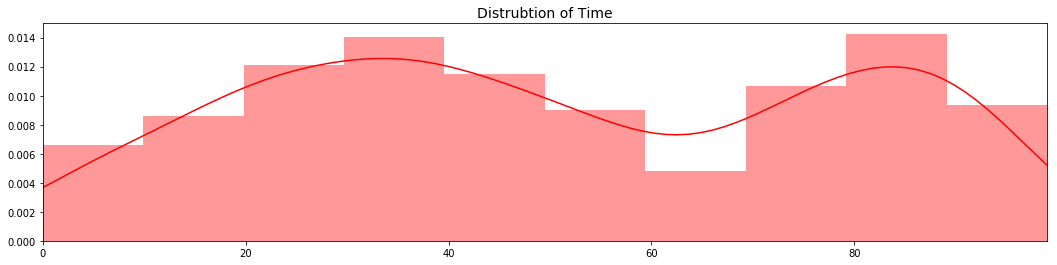

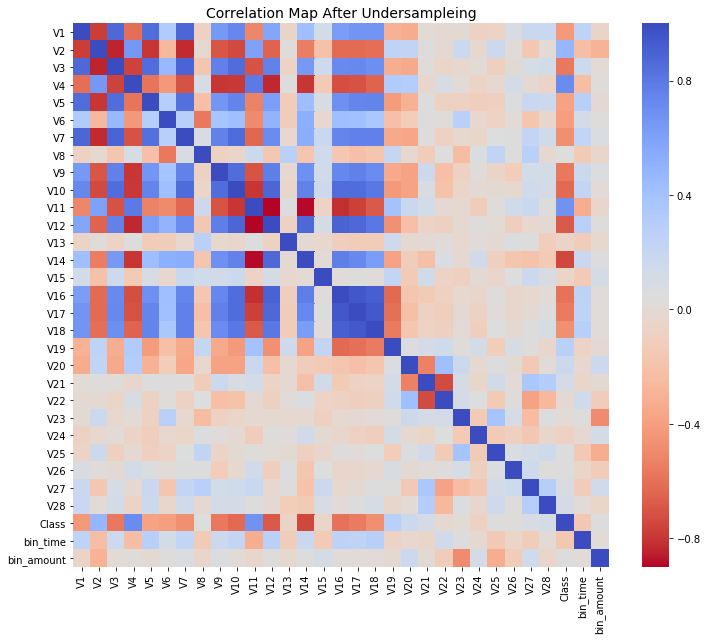

In [41]:
plot_count(balanced_df, 'Class Count [ 0 == Credible, 1 == Fraudulent ] for blanaced_df', 'Class')
create_distributed_plot(balanced_df['bin_amount'], 'Distrubtion of Amount')
create_distributed_plot(balanced_df['bin_time'], 'Distrubtion of Time')
show_correlation_matrix(balanced_df, 'Correlation Map After Undersampleing')
plt.show()

In [42]:
def filter_relative_features(data, target, start):
    cor = data.corr()
    cor_target = abs(cor[target])
    relevant_features = cor_target[cor_target>start]
    return relevant_features

In [43]:
def get_columns_from_series(s):
    result = []
    for i,r in s.items():
        result.append(i)
    return result


In [44]:
filtered_features_based_on_overall_correlation = filter_relative_features(balanced_df, 'Class', 0.5)

In [45]:
filtered_features_based_on_overall_correlation = get_columns_from_series(filtered_features_based_on_overall_correlation)

In [46]:
# excluding target feature
filtered_features_based_on_overall_correlation.remove('Class')

In [47]:
# Shallow feature correlation shows 9. 
# Will now use backward feature selection to determine the best features per model 
# Will use this size for and this feature selection to determine the best possible features
size_of_filtered_featured_based_on_correlation = len(filtered_features_based_on_overall_correlation)

In [48]:
random_forest = RandomForestClassifier(n_estimators=20)

In [49]:
naive_bayes = GaussianNB()

In [50]:
supervised = {
    naive_bayes.__class__.__name__ : naive_bayes,
    random_forest.__class__.__name__ : random_forest,
}

In [51]:
supervised

{'GaussianNB': GaussianNB(priors=None, var_smoothing=1e-09),
 'RandomForestClassifier': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
             oob_score=False, random_state=None, verbose=0,
             warm_start=False)}

In [52]:
balanced_df_features = balanced_df.drop('Class', axis=1)
balanced_df_target_feature_only = balanced_df['Class']

In [53]:
def get_backward_selected_features(amount_of_selected_features, m, df_with_features, df_with_target_feature):
#     Uses the backward feature selection approach
    feature_selector = SequentialFeatureSelector(m,
           k_features=amount_of_selected_features,
           forward=False,
           verbose=2,
           scoring='roc_auc',
           cv=4)
    features = feature_selector.fit(df_with_features, df_with_target_feature)
    filtered_features = df_with_features.columns[list(features.k_feature_idx_)]
    return list(filtered_features)
    

In [54]:
def get_filtered_features_by_model(amount_of_selected_features, supervised, df_with_features, df_with_target_feature):
    filtered_features_by_model = {}
    for modelName, modelObj in supervised.items():
        filtered_features_by_model[modelName+"_backward_selected_features"] = get_backward_selected_features(amount_of_selected_features, modelObj, df_with_features, df_with_target_feature)
    return filtered_features_by_model

In [55]:
filtered_features_by_correlation = get_filtered_features_by_model(
    size_of_filtered_featured_based_on_correlation,
    supervised,
    balanced_df_features, balanced_df_target_feature_only )

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.4s finished

[2019-11-17 17:12:45] Features: 29/9 -- score: 0.9564743208407693[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    0.3s finished

[2019-11-17 17:12:45] Features: 28/9 -- score: 0.9583911692775464[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    0.3s finished

[2019-11-17 17:12:46] Features: 27/9 -- score: 0.9602997554365789[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    3.6s finished

[2019-11-17 17:13:23] Features: 22/9 -- score: 0.9782371604203848[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    3.8s finished

[2019-11-17 17:13:27] Features: 21/9 -- score: 0.9766260162601625[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    3.1s finished

[2019-11-17 17:13:30] Features: 20/9 -- score: 0.9782784718091083[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    3.1s finished

[2019-11-17 17:13:33] Features: 19/9 -

In [56]:
filtered_features_by_correlation

{'GaussianNB_backward_selected_features': ['V4',
  'V6',
  'V7',
  'V13',
  'V14',
  'V19',
  'V23',
  'V25',
  'bin_time'],
 'RandomForestClassifier_backward_selected_features': ['V4',
  'V7',
  'V13',
  'V14',
  'V17',
  'V18',
  'V21',
  'V26',
  'V27']}

In [57]:
filtered_features_by_correlation['filtered_correlation_selected_features']  = filtered_features_based_on_overall_correlation

In [58]:
# This is the set a features I will test the balanced data set on 
filtered_features_by_correlation

{'GaussianNB_backward_selected_features': ['V4',
  'V6',
  'V7',
  'V13',
  'V14',
  'V19',
  'V23',
  'V25',
  'bin_time'],
 'RandomForestClassifier_backward_selected_features': ['V4',
  'V7',
  'V13',
  'V14',
  'V17',
  'V18',
  'V21',
  'V26',
  'V27'],
 'filtered_correlation_selected_features': ['V3',
  'V4',
  'V9',
  'V10',
  'V11',
  'V12',
  'V14',
  'V16',
  'V17']}

In [59]:
models_to_test = supervised

In [60]:
def create_confustion_matrix_and_score(correlation_name, model_name, model_to_test, X_test, y_test, filtered_features, version):
    score = model_to_test.score(X_test, y_test)
    y_predicted = model_to_test.predict(X_test)
    
    cm = confusion_matrix(y_test, y_predicted)
    
    accuray_score_data = accuracy_score(y_test, y_predicted)
    classification_report_data = classification_report(y_test, y_predicted)
    recall_score_data = recall_score(y_test, y_predicted)
    percision_score_data = precision_score(y_test, y_predicted)
    f1_score_data = f1_score(y_test, y_predicted)
    roc_auc_score_data = roc_auc_score(y_test, y_predicted)
    
    figure = plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True)
    title =  "VERSION: " +version
    title += "\nModel used: " 
    title += model_to_test.__class__.__name__
    title += "\nScore: "
    title += str(roc_auc_score_data)
    title += "\nCorelation Name : "
    title += correlation_name
    title += "\nFiltered Features Used: "
    title += str(filtered_features)
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    file_name = 'version_'+version+'confusion_matrix_'+str(model_to_test.__class__.__name__)+"_correlation_name_"+correlation_name+".jpg"
    figure.savefig(file_name)
    return {
        'cm' : cm,
        'title' : title,
        'file_name' : file_name,
        'model_name' : model_name,
        'correlation_name' : correlation_name,
        'model' : model_to_test,
        'score' : score,
        'accuray_score_data' : accuray_score_data,
        'classification_report_data' : classification_report_data,
        'recall_score_data' : recall_score_data,
        'percision_score_data' : percision_score_data,
        'f1_score_data' : f1_score_data,
        'roc_auc_score_data' : roc_auc_score_data
    } 


In [61]:
def test_models_by_feature_list(correlation_name,
                                list_of_filtered_features,
                                model_name,
                                model_to_test,
                                X_train,
                                X_test,
                                y_train,
                                y_test, version):
    
    model_to_test.fit(X_train, y_train)
    training_score = cross_val_score(model_to_test, X_train, y_train, cv=5)
    data = create_confustion_matrix_and_score(correlation_name, model_name, model_to_test, X_test, y_test, list_of_filtered_features, version)
    data['training_score'] = training_score
    model_pred = cross_val_predict(model_to_test, X_train, y_train, cv=5)
    roc_auc_score_corss_validation = roc_auc_score(y_train, model_pred)
    data['roc_auc_score_corss_validation']  = roc_auc_score_corss_validation
    data['roc_curve_data'] = roc_curve(y_train, model_pred)
    return data
    
    
    

In [62]:
def test_data(data_frame, version):
    
    results  = []

    for correlation_name, list_of_filtered_features in filtered_features_by_correlation.items():

        df_with_high_correlated_features = data_frame[list_of_filtered_features]

        df_target = data_frame['Class']

        X_train, X_test, y_train, y_test = train_test_split(df_with_high_correlated_features, df_target,test_size=.2)

        for model_name, model_to_test in models_to_test.items():
            res = test_models_by_feature_list(correlation_name,
                                                                list_of_filtered_features,
                                                                model_name,
                                                                model_to_test,
                                                                X_train,
                                                                X_test,
                                                                y_train,
                                                                y_test, version)
            results.append(res)
        plt.show()
    return results


In [63]:
def graph_roc_curve_multiple(data):
    fpr, tpr, thresold = data['roc_curve_data']
    plt.title('ROC Curve \n 2 Classifiers', fontsize=18)
    plt.plot(fpr, tpr, label=data['model_name']+'_'+data['correlation_name']+'{:.4f}'.format(data['roc_auc_score_data']))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()

In [64]:
def create_roc_cruve(results):    
    plt.figure(figsize=(16,8))
    for i, d in enumerate(results):
        graph_roc_curve_multiple(d)
    plt.show()

In [65]:
def print_result(d):
    CM = d['cm']
    TP = CM[0][0]
    FN = CM[0][1]
    FP = CM[1][0]
    TN = CM[1][1]

    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)
    # Specificity or true negative rate
    TNR = TN/(TN+FP) 
    # Precision or positive predictive value
    PPV = TP/(TP+FP)
    # Negative predictive value
    NPV = TN/(TN+FN)
    # Fall out or false positive rate
    FPR = FP/(FP+TN)
    # False negative rate
    FNR = FN/(TP+FN)
    # False discovery rate
    FDR = FP/(TP+FP)
    
    model_and_feature_used = 'Model and Feature used: '+ d['title'] 
    TN = "TN: " + str( np.round(TN, 2) )
    FN = "FN: " + str( np.round(FN, 2) )
    TP = "TP: " + str( np.round(TP, 2) )
    FP = "FP: " + str( np.round(FP, 2) )
    TPR = "TPR: " + str( np.round(TPR, 2) )
    TNR = "TNR: " + str( np.round(TNR, 2) )
    PPV = "PPV: " + str( np.round(PPV, 2) )
    NPV = "NPV: " + str( np.round(NPV, 2) )
    FPR = "FPR: " + str( np.round(FPR, 2) )
    FNR = "FNR: " + str( np.round(FNR, 2) )
    FDR = "FDR: " + str( np.round(FDR, 2) )
    Recall_Score = 'Recall Score: {:.2f}'.format(d['recall_score_data']) 
    Precision_Score = 'Precision Score: {:.2f}'.format(d['percision_score_data']) 
    F1_Score = 'F1 Score: {:.2f}'.format(d['f1_score_data'])
    Accuracy_Score = 'Accuracy Score: {:.2f}'.format(d['accuray_score_data']) 



    line =  TN +', '+ FN +', '+ TP +', '+ FP +', '+ TPR +', '+ TNR +', '+ PPV +', '+ NPV +', '+ FPR +', '+ FNR +', '+ FDR +', '+ Recall_Score +', '+ Precision_Score +', '+ F1_Score +', '+ Accuracy_Score

    print('---' * 10)
    print( model_and_feature_used )
    print( TN )
    print( FN )
    print( TP )
    print( FP )
    print( TPR )
    print( TNR )
    print( PPV )
    print( NPV )
    print( FPR )
    print( FNR )
    print( FDR )
    print( Recall_Score )
    print( Precision_Score )
    print( F1_Score )
    print( Accuracy_Score )
    print(line)
    print('---' * 10)

In [66]:
def print_all(results):
    for i, d in enumerate(results):
        print_result(d)
   

In [67]:
def show_all_confusion_matrix(results):
    stack_results = copy.deepcopy(results)
    fig, ax = plt.subplots(3, 2,figsize=(30,30))
    r = 0;
    c = 0;

    while (r < 3):
        while(c < 2):
            d = stack_results.pop()
            sns.heatmap(d['cm'], ax=ax[r][c], annot=True, cmap=plt.cm.copper, square=True, linewidths=0.1, annot_kws={"size":30}) 
            ax[r, c].set_title(d['title'], fontsize=16)
            ax[r, c].set_xticklabels(['', ''], fontsize=100, rotation=90)
            ax[r, c].set_yticklabels(['', ''], fontsize=100, rotation=360)
            c = c + 1
        c = 0
        r = r + 1 

    plt.show()

In [68]:
def determine_max_correlation(cm1, cm1Index , cm2, cm2Index):

    correct_credible_transactions_cm1 = cm1[0][0]
    incorrect_fraudulent_transactions_cm1 = cm1[0][1]
    incorrect_credible_transactions_cm1 = cm1[1][0]
    correct_fraudulent_transactions_cm1 = cm1[1][1]
    
    correct_credible_transactions_cm2 = cm2[0][0]
    incorrect_fraudulent_transactions_cm2 = cm2[0][1]
    incorrect_credible_transactions_cm2 = cm2[1][0]
    correct_fraudulent_transactions_cm2 = cm2[1][1]
    
#     Misclassifying fradulent transactions has the highest bussiness cost
    if(incorrect_fraudulent_transactions_cm1 > incorrect_fraudulent_transactions_cm2):
        return cm2Index
    elif(incorrect_fraudulent_transactions_cm1 < incorrect_fraudulent_transactions_cm2):
        return cm1Index

#     Checking count for in correct credible transactions
    if(incorrect_credible_transactions_cm1 > incorrect_credible_transactions_cm2):
        return cm2Index
    elif(incorrect_credible_transactions_cm1 < incorrect_credible_transactions_cm2):
        return cm1Index
    
#  Who has the most correct credible transactions
    if(correct_credible_transactions_cm1 > correct_credible_transactions_cm2):
        return cm1Index
    elif(correct_credible_transactions_cm1 < correct_credible_transactions_cm2):
        return cm2Index
    
    if(correct_fraudulent_transactions_cm1 > correct_fraudulent_transactions_cm2):
        return cm1Index
    elif(correct_fraudulent_transactions_cm1 < correct_fraudulent_transactions_cm2):
        return cm2Index
    
    return cm2Index
        

In [69]:
def get_best_result(res):
    maxResultIndex = 0
    initCm = res[0]['cm']
    for i, r in enumerate(res):
        maxResultIndex = determine_max_correlation(res[maxResultIndex]['cm'], maxResultIndex, r['cm'], i)    
    print("MAX_RESULT_INDEX: "+ str(maxResultIndex))
    return res[maxResultIndex]

In [70]:
version = "balanced_df"

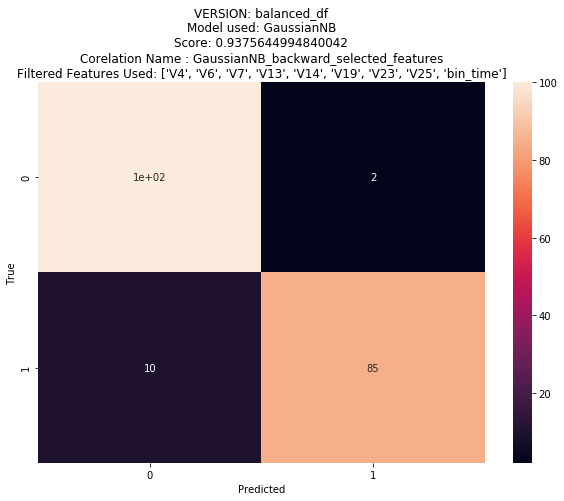

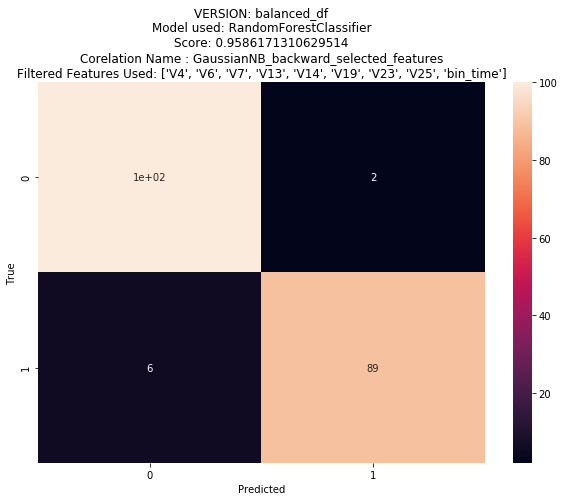

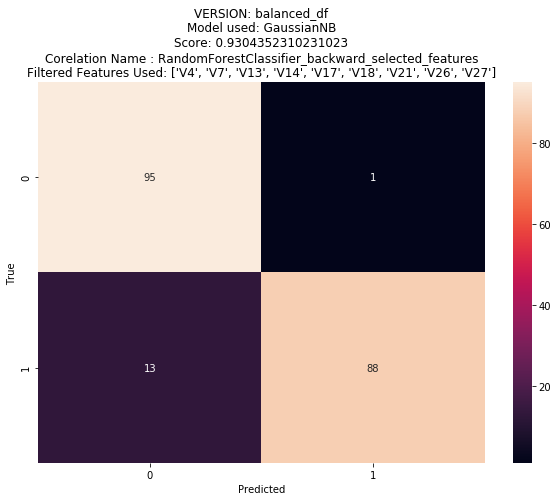

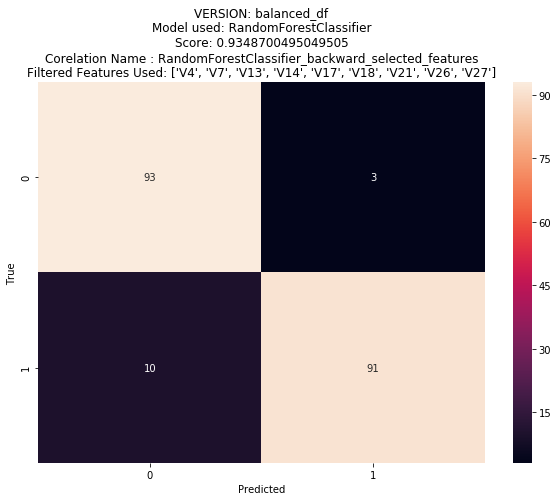

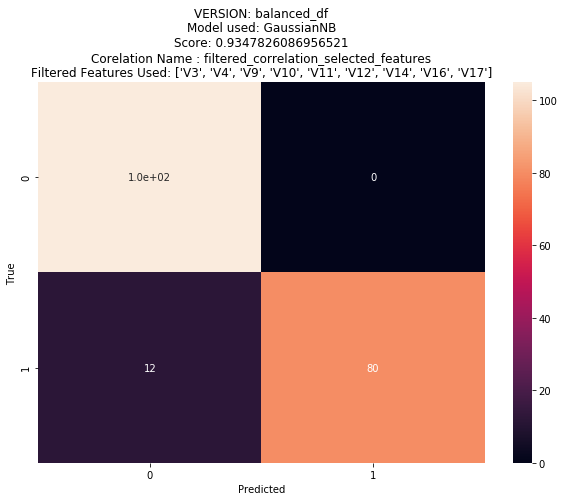

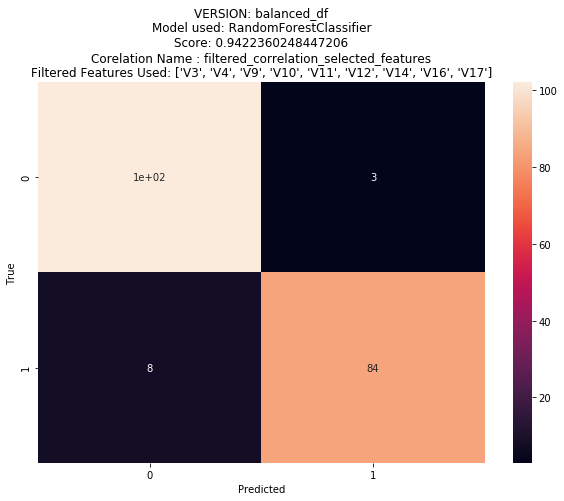

In [71]:
results = test_data(balanced_df, version)

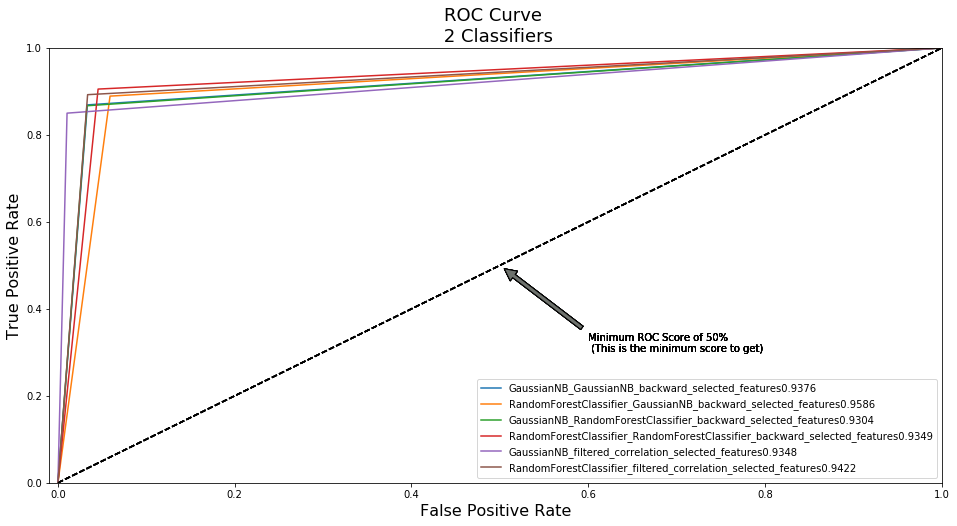

In [72]:
create_roc_cruve(results)

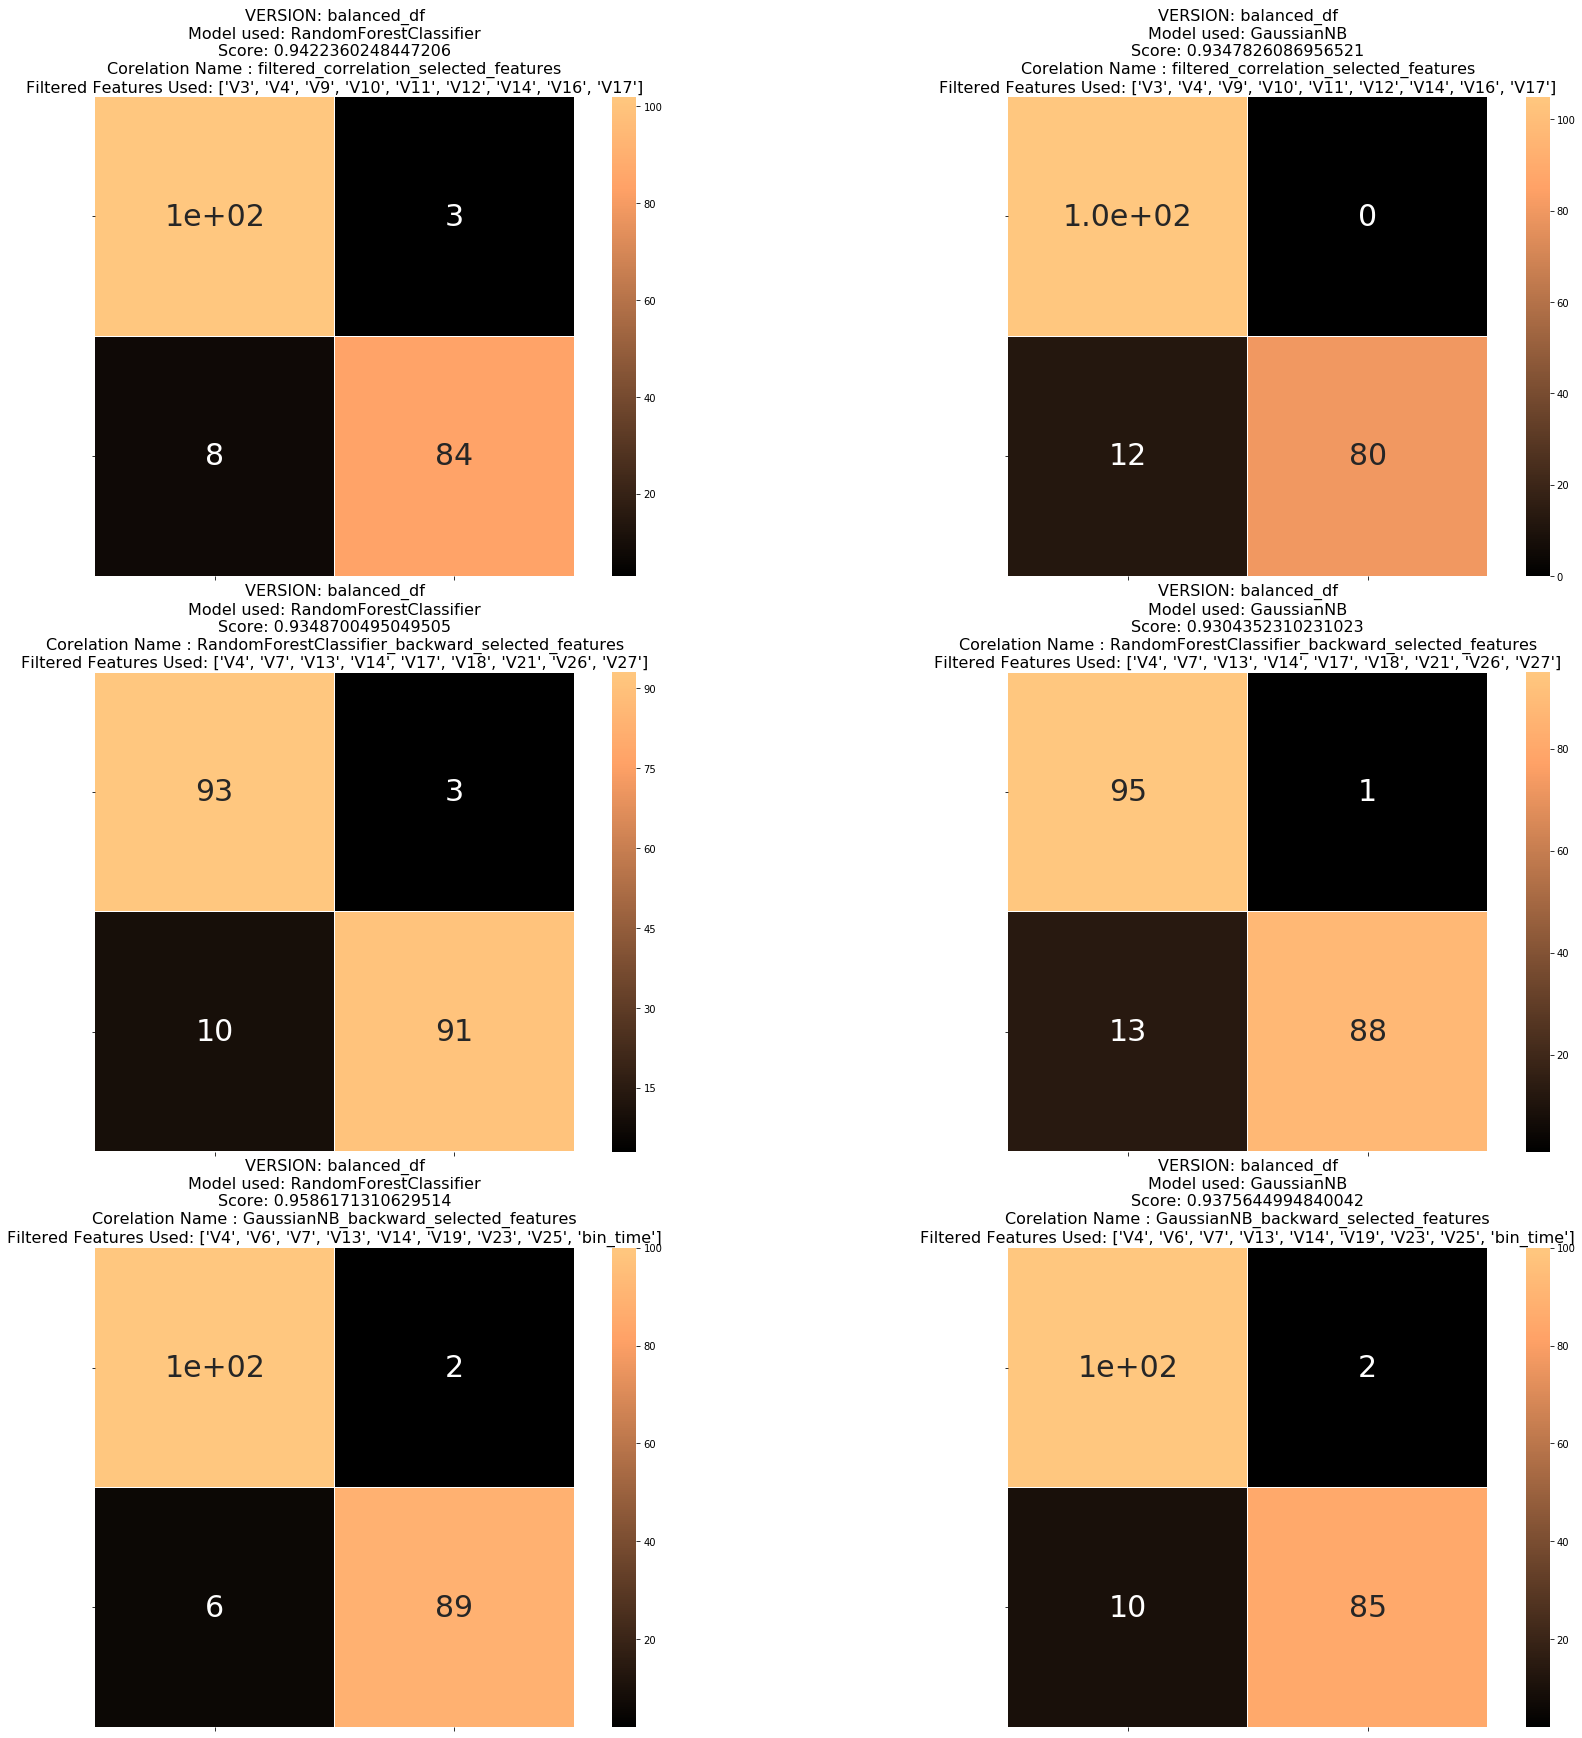

In [73]:
show_all_confusion_matrix(results)

In [74]:
print_all(results)

------------------------------
Model and Feature used: VERSION: balanced_df
Model used: GaussianNB
Score: 0.9375644994840042
Corelation Name : GaussianNB_backward_selected_features
Filtered Features Used: ['V4', 'V6', 'V7', 'V13', 'V14', 'V19', 'V23', 'V25', 'bin_time']
TN: 85
FN: 2
TP: 100
FP: 10
TPR: 0.98
TNR: 0.89
PPV: 0.91
NPV: 0.98
FPR: 0.11
FNR: 0.02
FDR: 0.09
Recall Score: 0.89
Precision Score: 0.98
F1 Score: 0.93
Accuracy Score: 0.94
TN: 85, FN: 2, TP: 100, FP: 10, TPR: 0.98, TNR: 0.89, PPV: 0.91, NPV: 0.98, FPR: 0.11, FNR: 0.02, FDR: 0.09, Recall Score: 0.89, Precision Score: 0.98, F1 Score: 0.93, Accuracy Score: 0.94
------------------------------
------------------------------
Model and Feature used: VERSION: balanced_df
Model used: RandomForestClassifier
Score: 0.9586171310629514
Corelation Name : GaussianNB_backward_selected_features
Filtered Features Used: ['V4', 'V6', 'V7', 'V13', 'V14', 'V19', 'V23', 'V25', 'bin_time']
TN: 89
FN: 2
TP: 100
FP: 6
TPR: 0.98
TNR: 0.94
PPV:

In [75]:
best_result = get_best_result(results)

MAX_RESULT_INDEX: 4


In [76]:
print_result(best_result)

------------------------------
Model and Feature used: VERSION: balanced_df
Model used: GaussianNB
Score: 0.9347826086956521
Corelation Name : filtered_correlation_selected_features
Filtered Features Used: ['V3', 'V4', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17']
TN: 80
FN: 0
TP: 105
FP: 12
TPR: 1.0
TNR: 0.87
PPV: 0.9
NPV: 1.0
FPR: 0.13
FNR: 0.0
FDR: 0.1
Recall Score: 0.87
Precision Score: 1.00
F1 Score: 0.93
Accuracy Score: 0.94
TN: 80, FN: 0, TP: 105, FP: 12, TPR: 1.0, TNR: 0.87, PPV: 0.9, NPV: 1.0, FPR: 0.13, FNR: 0.0, FDR: 0.1, Recall Score: 0.87, Precision Score: 1.00, F1 Score: 0.93, Accuracy Score: 0.94
------------------------------


In [77]:
print("Best result from test data: ")
print(best_result['title'])

Best result from test data: 
VERSION: balanced_df
Model used: GaussianNB
Score: 0.9347826086956521
Corelation Name : filtered_correlation_selected_features
Filtered Features Used: ['V3', 'V4', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17']


In [78]:
results

[{'cm': array([[100,   2],
         [ 10,  85]]),
  'title': "VERSION: balanced_df\nModel used: GaussianNB\nScore: 0.9375644994840042\nCorelation Name : GaussianNB_backward_selected_features\nFiltered Features Used: ['V4', 'V6', 'V7', 'V13', 'V14', 'V19', 'V23', 'V25', 'bin_time']",
  'file_name': 'version_balanced_dfconfusion_matrix_GaussianNB_correlation_name_GaussianNB_backward_selected_features.jpg',
  'model_name': 'GaussianNB',
  'correlation_name': 'GaussianNB_backward_selected_features',
  'model': GaussianNB(priors=None, var_smoothing=1e-09),
  'score': 0.9390862944162437,
  'accuray_score_data': 0.9390862944162437,
  'classification_report_data': '              precision    recall  f1-score   support\n\n           0       0.91      0.98      0.94       102\n           1       0.98      0.89      0.93        95\n\n   micro avg       0.94      0.94      0.94       197\n   macro avg       0.94      0.94      0.94       197\nweighted avg       0.94      0.94      0.94       197\n

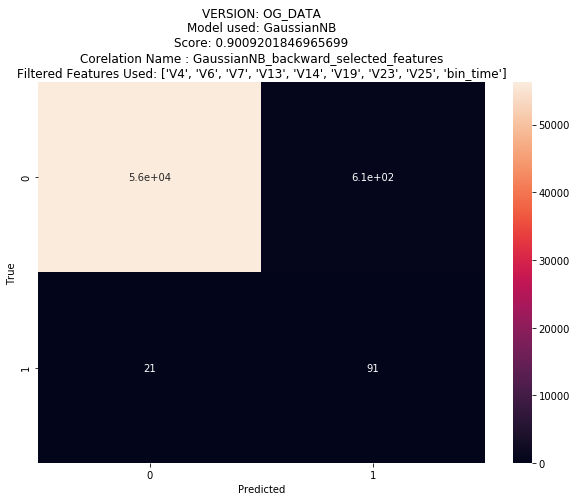

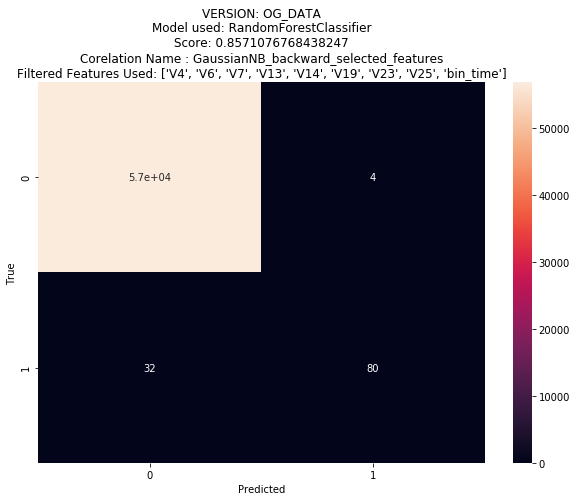

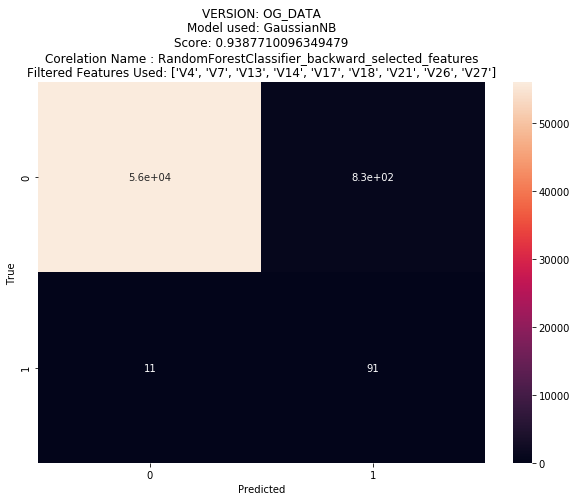

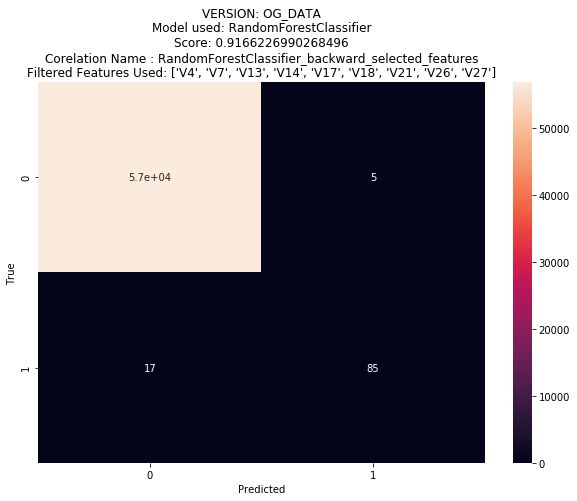

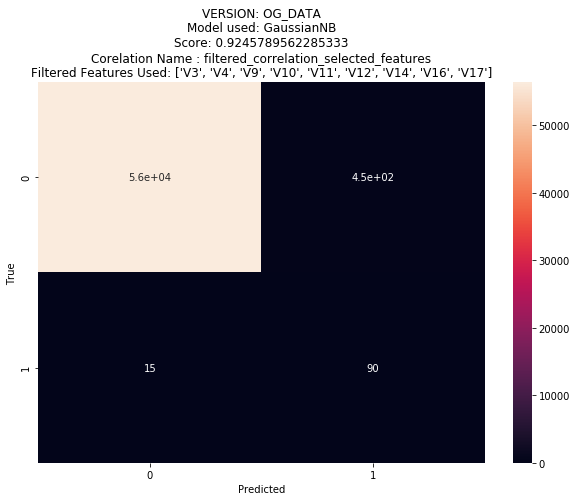

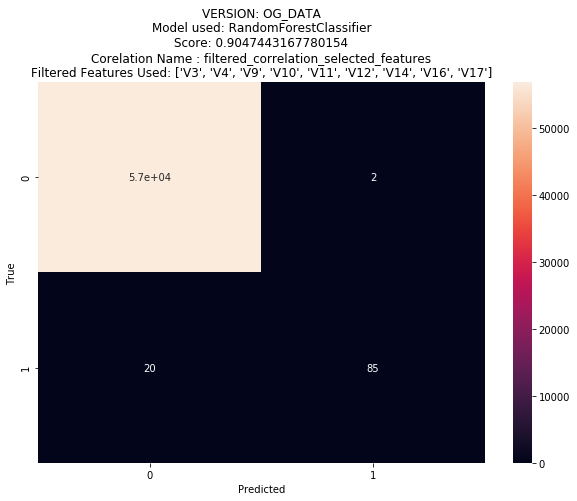

In [79]:
results_based_off_og = test_data(df, "OG_DATA")

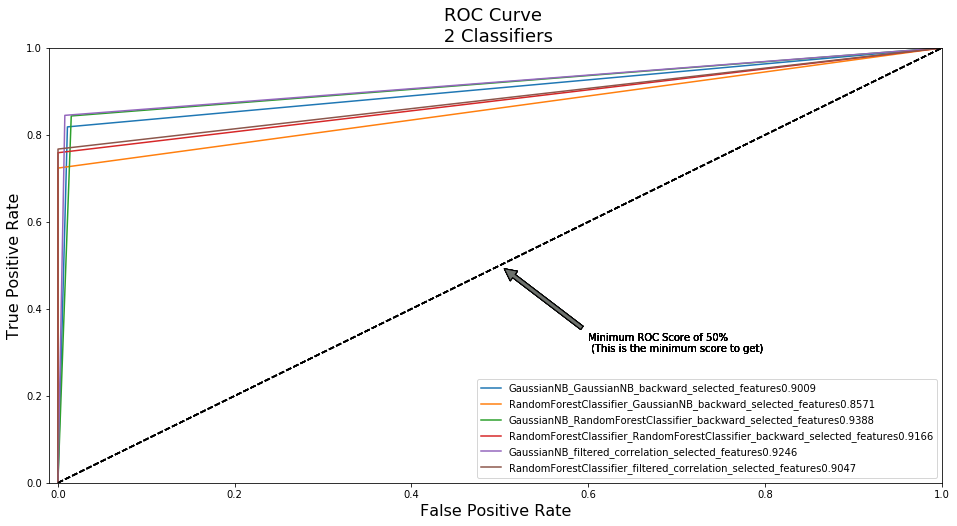

In [80]:
create_roc_cruve(results_based_off_og)

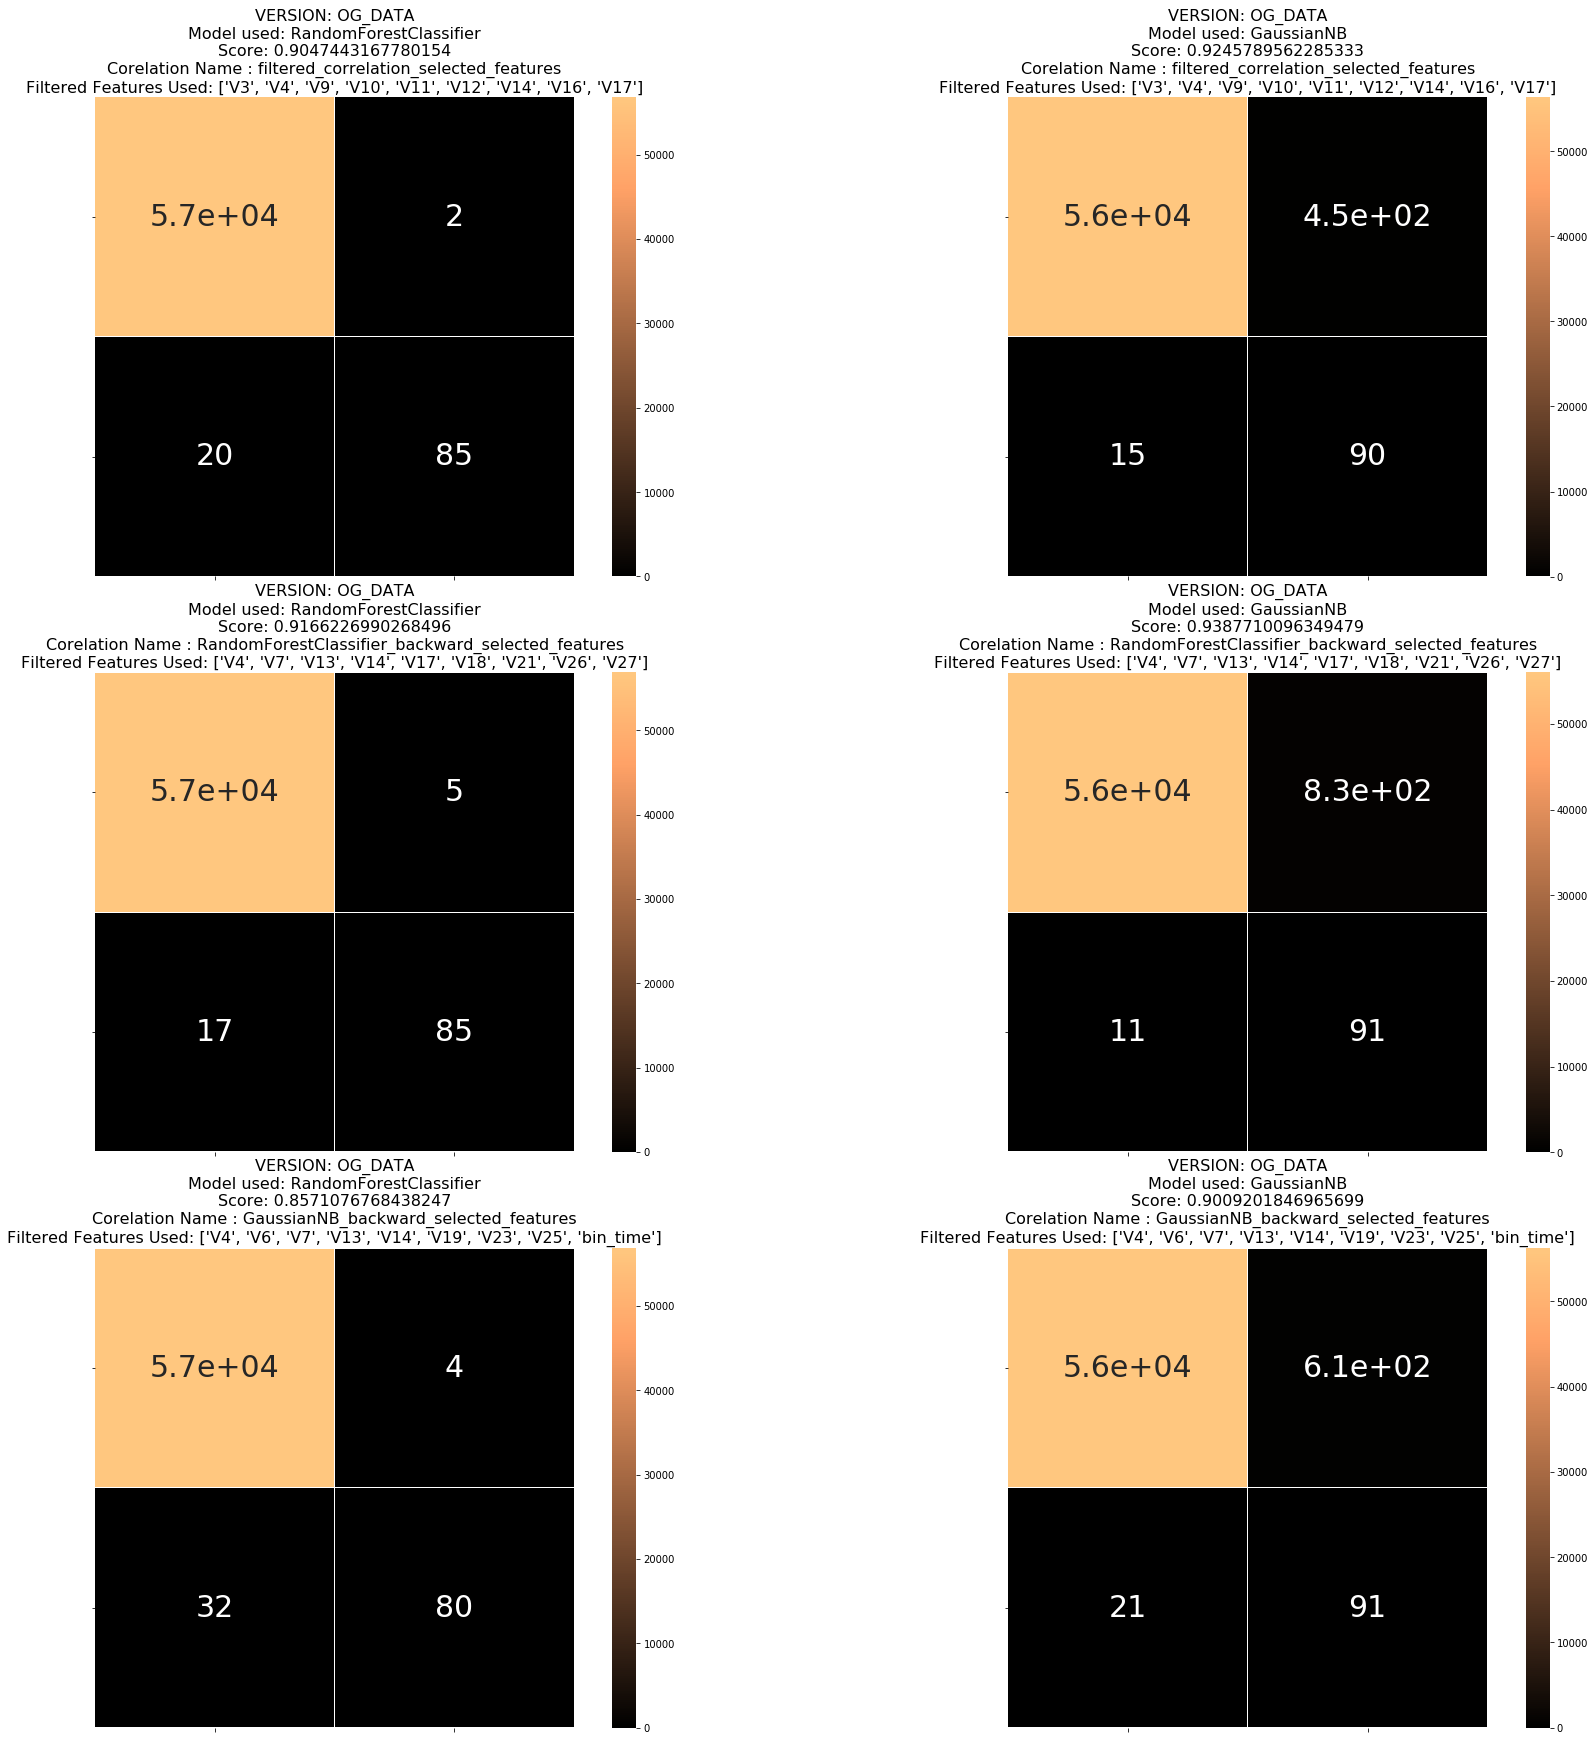

In [81]:
show_all_confusion_matrix(results_based_off_og)

In [82]:
print_all(results_based_off_og)

------------------------------
Model and Feature used: VERSION: OG_DATA
Model used: GaussianNB
Score: 0.9009201846965699
Corelation Name : GaussianNB_backward_selected_features
Filtered Features Used: ['V4', 'V6', 'V7', 'V13', 'V14', 'V19', 'V23', 'V25', 'bin_time']
TN: 91
FN: 606
TP: 56244
FP: 21
TPR: 0.99
TNR: 0.81
PPV: 1.0
NPV: 0.13
FPR: 0.19
FNR: 0.01
FDR: 0.0
Recall Score: 0.81
Precision Score: 0.13
F1 Score: 0.22
Accuracy Score: 0.99
TN: 91, FN: 606, TP: 56244, FP: 21, TPR: 0.99, TNR: 0.81, PPV: 1.0, NPV: 0.13, FPR: 0.19, FNR: 0.01, FDR: 0.0, Recall Score: 0.81, Precision Score: 0.13, F1 Score: 0.22, Accuracy Score: 0.99
------------------------------
------------------------------
Model and Feature used: VERSION: OG_DATA
Model used: RandomForestClassifier
Score: 0.8571076768438247
Corelation Name : GaussianNB_backward_selected_features
Filtered Features Used: ['V4', 'V6', 'V7', 'V13', 'V14', 'V19', 'V23', 'V25', 'bin_time']
TN: 80
FN: 4
TP: 56846
FP: 32
TPR: 1.0
TNR: 0.71
PPV: 1

In [83]:
best_result = get_best_result(results_based_off_og)

MAX_RESULT_INDEX: 5


In [84]:
print_result(best_result)

------------------------------
Model and Feature used: VERSION: OG_DATA
Model used: RandomForestClassifier
Score: 0.9047443167780154
Corelation Name : filtered_correlation_selected_features
Filtered Features Used: ['V3', 'V4', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17']
TN: 85
FN: 2
TP: 56855
FP: 20
TPR: 1.0
TNR: 0.81
PPV: 1.0
NPV: 0.98
FPR: 0.19
FNR: 0.0
FDR: 0.0
Recall Score: 0.81
Precision Score: 0.98
F1 Score: 0.89
Accuracy Score: 1.00
TN: 85, FN: 2, TP: 56855, FP: 20, TPR: 1.0, TNR: 0.81, PPV: 1.0, NPV: 0.98, FPR: 0.19, FNR: 0.0, FDR: 0.0, Recall Score: 0.81, Precision Score: 0.98, F1 Score: 0.89, Accuracy Score: 1.00
------------------------------


In [85]:
print("Best result from test data: ")
print(best_result['title'])

Best result from test data: 
VERSION: OG_DATA
Model used: RandomForestClassifier
Score: 0.9047443167780154
Corelation Name : filtered_correlation_selected_features
Filtered Features Used: ['V3', 'V4', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17']
